# Employee Retention - Classfication

## Part 2. Data Cleaning + Feature Engineering

<br id='toc'></br>
**Table of Contents**
1. [Data cleaning](#clean)
    1. [Unwanted Observations](#unwant)
    2. [Fix structural errors](#struct)
    3. [Outliers](#out)
    4. [Missing values](#miss)
2. [Feature engineering](#engine)
    1. evaluation x satisfaction
    2. working hour x satisfaction
    3. save analytical base table


In [1]:
# Load libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import math

In [2]:
# Load data
df = pd.read_csv('../data/employee_data.csv')
print (df.shape)

(14249, 10)


In [3]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


<a id  ='clean'></a>
### 1. Data cleaning
<a id = 'unwant'></a>
#### 1.A. Unwanted observations

In [4]:
df.department.value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: department, dtype: int64

In [5]:
df = df[df.department != 'temp']

In [7]:
df.shape

(14068, 10)

In [8]:
# check for duplicates
df.duplicated(keep = False).sum()

0

[back to top](#toc)

<a id = 'struct'></a>
#### 1.B. Fix structural errors

In [10]:
# save
df.department.replace('information_technology', 'IT', inplace = True)

In [12]:
df.department.value_counts()

sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
management      595
admin           176
procurement     174
Name: department, dtype: int64

In [14]:
#save
df.salary.replace({'low':0, 'medium':1, 'high':2}, inplace=True)

In [15]:
df.salary.value_counts()

0    6871
1    6055
2    1142
Name: salary, dtype: int64

In [16]:
# status to target
target_col = 'status'

In [18]:
#save
df.status.replace({'Left':1, 'Employed':0}, inplace = True)

In [19]:
df.status.value_counts()

0    10701
1     3367
Name: status, dtype: int64

In [20]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                 int64
satisfaction         float64
status                 int64
tenure               float64
dtype: object

In [21]:
num_cols = df.dtypes[df.dtypes != 'object'].index.tolist()

In [23]:
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg_monthly_hrs,14068.0,201.083736,49.959962,96.000000,156.000000,200.000000,245.000000,310.0
filed_complaint,2025.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
last_evaluation,12717.0,0.718477,0.173062,0.316175,0.563866,0.724939,0.871358,1.0
n_projects,14068.0,3.801038,1.236058,2.000000,3.000000,4.000000,5.000000,7.0
recently_promoted,300.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
salary,14068.0,0.592764,0.635435,0.000000,0.000000,1.000000,1.000000,2.0
satisfaction,14068.0,0.621295,0.250469,0.040058,0.450390,0.652527,0.824951,1.0
status,14068.0,0.239338,0.426694,0.000000,0.000000,0.000000,0.000000,1.0
tenure,14068.0,3.497228,1.460917,2.000000,3.000000,3.000000,4.000000,10.0


In [24]:
# filed_complaint: num to ind
df.filed_complaint.value_counts()

1.0    2025
Name: filed_complaint, dtype: int64

In [26]:
#save
df.filed_complaint.fillna(0, inplace = True)

In [27]:
df.filed_complaint.unique()

array([0., 1.])

In [28]:
# recently_promoted: num to ind
df.recently_promoted.unique()

array([nan,  1.])

In [29]:
#save
df.recently_promoted.fillna(0, inplace = True)

In [30]:
df.recently_promoted.unique()

array([0., 1.])

In [31]:
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg_monthly_hrs,14068.0,201.083736,49.959962,96.000000,156.000000,200.000000,245.000000,310.0
filed_complaint,14068.0,0.143944,0.351045,0.000000,0.000000,0.000000,0.000000,1.0
last_evaluation,12717.0,0.718477,0.173062,0.316175,0.563866,0.724939,0.871358,1.0
n_projects,14068.0,3.801038,1.236058,2.000000,3.000000,4.000000,5.000000,7.0
recently_promoted,14068.0,0.021325,0.144470,0.000000,0.000000,0.000000,0.000000,1.0
salary,14068.0,0.592764,0.635435,0.000000,0.000000,1.000000,1.000000,2.0
satisfaction,14068.0,0.621295,0.250469,0.040058,0.450390,0.652527,0.824951,1.0
status,14068.0,0.239338,0.426694,0.000000,0.000000,0.000000,0.000000,1.0
tenure,14068.0,3.497228,1.460917,2.000000,3.000000,3.000000,4.000000,10.0


[back to top](#toc)
<a id='out'></a>
#### 1.C. Outliers

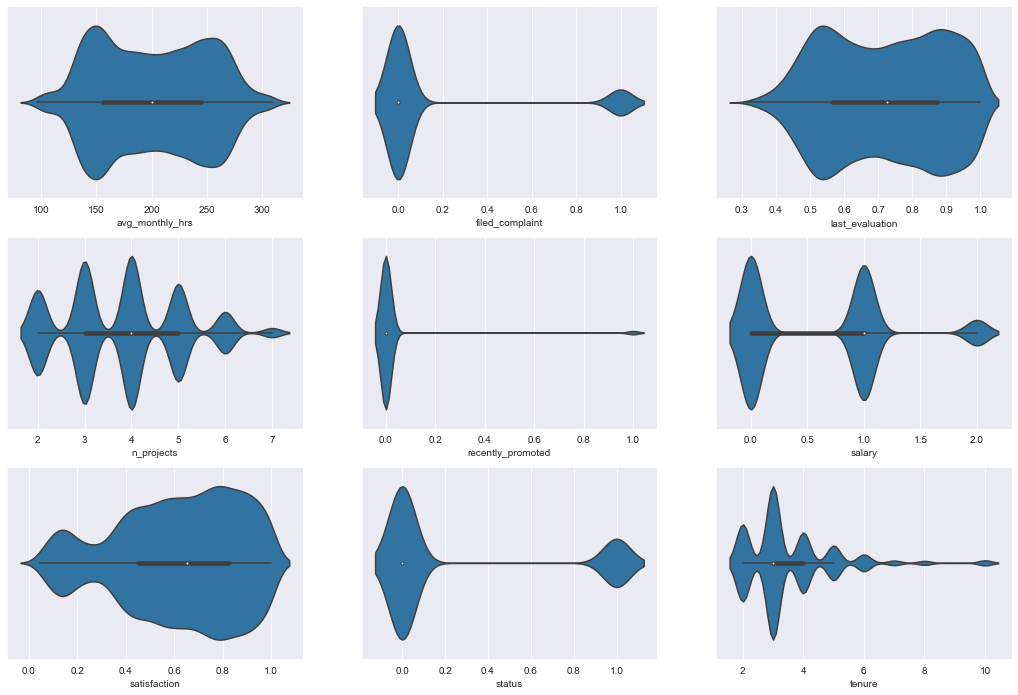

In [32]:
# check for them again, nothing looks suspicous
fig, axes = plt.subplots(math.ceil(len(num_cols)/3), 3, figsize = (18, 12))
axes = axes.ravel()

for i in range(len(num_cols)):
    sns.violinplot(df[num_cols[i]], ax = axes[i])
    axes[i].set_xlabel(num_cols[i])


[back to top](#toc)

<a id='miss'></a>
#### 1.D. Missing Values
##### 1.D.1. Categorical missing values

In [37]:
#save
df.department.fillna('Missing', inplace = True)

In [38]:
df.department.value_counts()

sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
Missing         709
management      595
admin           176
procurement     174
Name: department, dtype: int64

In [39]:
df.department.isnull().sum()

0

##### 1.D.2. Numerical Missing Values

In [40]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 14248
Data columns (total 9 columns):
avg_monthly_hrs      14068 non-null int64
filed_complaint      14068 non-null float64
last_evaluation      12717 non-null float64
n_projects           14068 non-null int64
recently_promoted    14068 non-null float64
salary               14068 non-null int64
satisfaction         14068 non-null float64
status               14068 non-null int64
tenure               14068 non-null float64
dtypes: float64(5), int64(4)
memory usage: 1.1 MB


In [41]:
# only last_evaluation has missing value
df[num_cols].isnull().sum()

avg_monthly_hrs         0
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [42]:
#save
df.loc[:,'last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [43]:
df.last_evaluation_missing.describe()

count    14068.000000
mean         0.096034
std          0.294648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: last_evaluation_missing, dtype: float64

In [45]:
round(df.last_evaluation.mean(), 2)

0.72

In [46]:
#save
df.last_evaluation.fillna(0.72, inplace = True)

In [47]:
df[num_cols].isnull().sum().sum()

0

<div class = 'alert alert-info'>

**Notes for data cleaning:**

- cat_cols:
    - ~~unwated observation: department = temp~~
    - ~~structural errors: department = IT/information_technology~~
    - ~~missing values: department~~
    - ~~cat->ord: salary~~
    - ~~cat->target: status~~

- num_cols:
    - ~~num->ind: filed_complaint, recently_promoted~~
    - ~~missing values: all except for avg_monthly_hrs~~
    - ~~outliers: doesn't appear to have any~~
    
</div>

[back to top](#toc)

<a id='engine'></a>
### 2. Features engineering

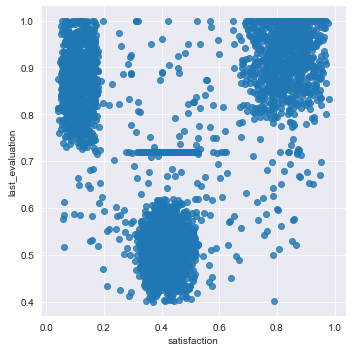

In [48]:
sns.lmplot(y='last_evaluation', x = 'satisfaction', data = df[df.status==1], fit_reg= False)
plt.show()

In [49]:
#save
df['underperformer'] = (df.last_evaluation < 0.65).astype(int)

df['overqualified'] = ((df.satisfaction < 0.2) & (df.last_evaluation >0.7)).astype(int)

df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [50]:
df[['underperformer', 'overqualified', 'overachiever']].mean()

underperformer    0.356412
overqualified     0.077339
overachiever      0.177069
dtype: float64

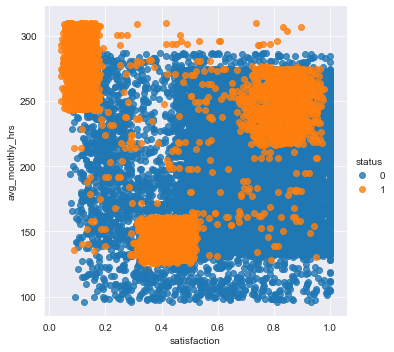

In [51]:
sns.lmplot(y = 'avg_monthly_hrs', x = 'satisfaction', hue = 'status', data = df, fit_reg=False)
plt.show()

In [52]:
#save
df['burnout'] = ((df.avg_monthly_hrs>240) & (df.satisfaction < 0.2)).astype(int)

In [53]:
df.burnout.mean()

0.0685953938015354

In [54]:
df.status.mean()

0.23933750355416547

In [55]:
df.shape

(14068, 15)

In [56]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing,underperformer,overqualified,overachiever,burnout
0,221,engineering,0.0,0.932868,4,0.0,0,0.829896,1,5.0,0,0,0,1,0
1,232,support,0.0,0.720000,3,0.0,0,0.834544,0,2.0,1,0,0,0,0
2,184,sales,0.0,0.788830,3,0.0,1,0.834988,0,3.0,0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,0,0.424764,0,2.0,0,1,0,0,0
4,249,sales,0.0,0.845217,3,0.0,0,0.779043,0,3.0,0,0,0,1,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 14248
Data columns (total 15 columns):
avg_monthly_hrs            14068 non-null int64
department                 14068 non-null object
filed_complaint            14068 non-null float64
last_evaluation            14068 non-null float64
n_projects                 14068 non-null int64
recently_promoted          14068 non-null float64
salary                     14068 non-null int64
satisfaction               14068 non-null float64
status                     14068 non-null int64
tenure                     14068 non-null float64
last_evaluation_missing    14068 non-null int64
underperformer             14068 non-null int64
overqualified              14068 non-null int64
overachiever               14068 non-null int64
burnout                    14068 non-null int64
dtypes: float64(5), int64(9), object(1)
memory usage: 1.7+ MB


In [66]:
ndf = pd.read_csv('../data/unseen_employee_data.csv')

In [67]:
ndf.shape

(750, 9)

In [68]:
df = pd.get_dummies(df)

In [69]:
df.shape

(14068, 25)

#### Save analytical base table

In [70]:
df.to_csv('../data/analytical_base_table.csv', index = None)

In [71]:
# check saved ABT is correct
abt = pd.read_csv('../data/analytical_base_table.csv',float_precision='round_trip')

In [72]:
abt.shape

(14068, 25)

In [73]:
(abt == df.reset_index(drop=True)).all()

avg_monthly_hrs            True
filed_complaint            True
last_evaluation            True
n_projects                 True
recently_promoted          True
salary                     True
satisfaction               True
status                     True
tenure                     True
last_evaluation_missing    True
underperformer             True
overqualified              True
overachiever               True
burnout                    True
department_IT              True
department_Missing         True
department_admin           True
department_engineering     True
department_finance         True
department_management      True
department_marketing       True
department_procurement     True
department_product         True
department_sales           True
department_support         True
dtype: bool

[back to top](#toc)